In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
import math


In [2]:
data = pd.read_excel("D:/ai/neural networks/power_data_inkw.xlsx")
data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [3]:
data = data.rename(columns={5551.82208:'load'},inplace=False)

In [4]:
data.describe()

,load
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [5]:

data.isnull().sum()

load    0
dtype: int64

In [6]:
#checking outliners

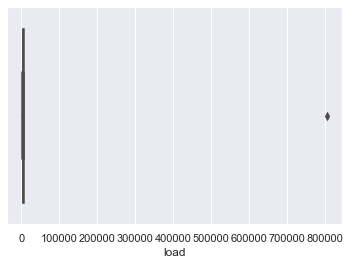

In [7]:
sns.set(style = 'darkgrid')
sns.boxplot(data['load'])

In [8]:
from scipy import stats

z = np.abs(stats.zscore(data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))

(array([928], dtype=int64),)


In [9]:

data.iloc[928,0] = data.iloc[927,0]

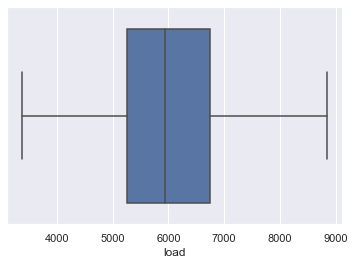

In [10]:
sns.set(style = 'darkgrid')
sns.boxplot(data['load'])

In [11]:
data_x = []
data_y = []
for i in range(0,len(data)-24):
  data_x.append(data.iloc[i,0])
  data_y.append(data.iloc[i+24,0])

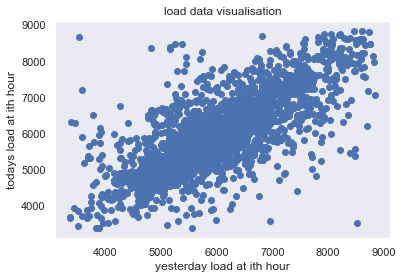

In [12]:
plt.scatter(data_x,data_y)
plt.title("load data visualisation")
plt.xlabel("yesterday load at ith hour")
plt.ylabel("todays load at ith hour")
plt.grid()

In [13]:
data_xx = pd.DataFrame(data_x)
min_x = float(data_xx.min())
max_x = float(data_xx.max())
data_yy = pd.DataFrame(data_y)
min_y = float(data_yy.min())
max_y = float(data_yy.max())
print(min_x)
print(min_y)
print(max_x)
print(max_y)

3377.9196
3377.9196
8841.66948
8841.66948


In [14]:
#data normalization

In [15]:

x = minmax_scale(data_x)
y = minmax_scale(data_y)

In [16]:

nmd = []
for i in range(len(data)-24):
  nmd.append([x[i],y[i]])



#splitting data


In [17]:
from sklearn.model_selection import train_test_split
data_train,data_test = train_test_split(nmd,test_size=0.1)

In [18]:
#training the model

In [19]:
df = pd.DataFrame(data=data_train)

In [20]:
df

,0,1
0,0.230635,0.151836
1,0.601923,0.429945
2,0.589997,0.320904
3,0.563465,0.702976
4,0.477019,0.470743
...,...,...
1938,0.224131,0.228239
1939,0.467062,0.563465
1940,0.436307,0.426807
1941,0.199623,0.340019


In [21]:
ns = df.shape[0]
ns

1943

In [22]:
#intialization
n=0.1
i=0 
epochs=2500
m=1
c=-1
Gm=0
Gc=0
expo=10**(-8)
dm=0
dc=0

In [23]:
while i<epochs:
    
    for j in range(0,ns):
        gm=(-1)*(df[1][j]-m*df[0][j]-c)*df[0][j]
        gc=(-1)*(df[1][j]-m*df[0][j]-c)
        
        Gm=Gm+(gm**2)
        Gc=Gc+(gc**2)
        
        f1 = math.sqrt(Gm + expo)
        f2 = math.sqrt(Gc + expo)
        dm = -1*(n/f1)*gm
        dc = -1*(n/f2)*gc
       
        m=m+dm
        c=c+dc
    
    i=i+1
        
    
  
print(m,c)

0.749047152905394 0.11951650133457539


In [24]:
df['yp']=np.nan

In [25]:
for i in range(0,ns):
    df['yp'][i]=m*df[0][i]+c


In [26]:
df

,0,1,yp
0,0.230635,0.151836,0.292273
1,0.601923,0.429945,0.570385
2,0.589997,0.320904,0.561452
3,0.563465,0.702976,0.541578
4,0.477019,0.470743,0.476826
...,...,...,...
1938,0.224131,0.228239,0.287401
1939,0.467062,0.563465,0.469368
1940,0.436307,0.426807,0.446331
1941,0.199623,0.340019,0.269044


In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
mse_train = mean_squared_error(df[1],df['yp'])

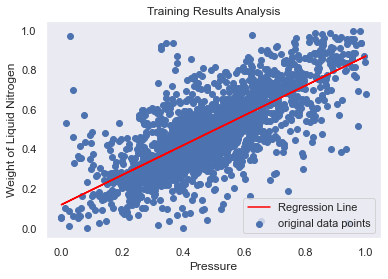

In [29]:
plt.plot(df[0],df['yp'],'red',label="Regression Line")
plt.scatter(df[0],df[1],label="original data points")
plt.xlabel("Pressure")
plt.ylabel("Weight of Liquid Nitrogen")
plt.legend()
plt.grid()
plt.title("Training Results Analysis")
plt.show()
%matplotlib inline

In [30]:
df = pd.DataFrame(data=data_test)
ns=df.shape[0]

In [31]:
df['yp']=np.nan
for i in range(0,ns):
    df['yp'][i]=m*df[0][i]+c
df

,0,1,yp
0,0.560355,0.611167,0.539249
1,0.527232,0.572794,0.514438
2,0.271547,0.319905,0.322918
3,0.482554,0.691278,0.480972
4,0.824684,0.342672,0.737244
...,...,...,...
211,0.477818,0.503324,0.477425
212,0.439474,0.509144,0.448703
213,0.712733,0.775156,0.653387
214,0.236085,0.151579,0.296355


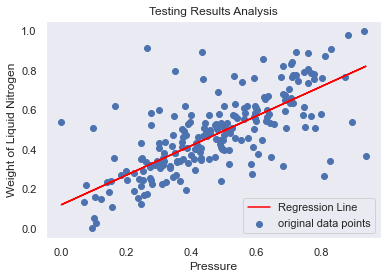

In [32]:
plt.plot(df[0],df['yp'],'red',label="Regression Line")
plt.scatter(df[0],df[1],label="original data points")
plt.xlabel("Pressure")
plt.ylabel("Weight of Liquid Nitrogen")
plt.legend()
plt.grid()
plt.title("Testing Results Analysis")
plt.show()
%matplotlib inline

In [ ]:
x = float(input("enter the yesterday load at this time :"))
x = (x - min_x)/(max_x - min_x)
y = m*x + c
y = (y)*(max_y - min_y) + min_y
y